In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb


train = pd.read_csv("train.csv")

In [2]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train = train.drop(["Id"], axis=1)

In [4]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
train = train.dropna(axis=1)

In [9]:
train.isnull().sum().sum()

0

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [11]:
ohe = train.select_dtypes(include = ['object'])

In [12]:
ohe.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
ohe_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition']

ohe_train = pd.get_dummies(train, columns=ohe_columns)

In [14]:
ohe_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,1,0,0,0,0,1,0


In [15]:

corr = ohe_train.corr()

# 相関係数が正の列だけを取り出す
positive_corr_columns = corr.loc[:, corr.mean() > 0].columns

positive_corr_columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=160)

In [16]:
negative_columns = set(ohe_train.columns) - set(positive_corr_columns)
negative_columns

{'BldgType_1Fam',
 'BldgType_Twnhs',
 'CentralAir_Y',
 'Condition1_Norm',
 'Condition2_Norm',
 'ExterCond_Gd',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Functional_Maj2',
 'Functional_Typ',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_Grav',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'KitchenQual_TA',
 'LandContour_Lvl',
 'LandSlope_Gtl',
 'LotConfig_Inside',
 'LotShape_Reg',
 'MSZoning_RM',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'OverallCond',
 'PavedDr

In [17]:
ohe_train = ohe_train.drop(['BldgType_1Fam',
 'BldgType_Twnhs',
 'CentralAir_Y',
 'Condition1_Norm',
 'Condition2_Norm',
 'ExterCond_Gd',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Functional_Maj2',
 'Functional_Typ',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_Grav',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'KitchenQual_TA',
 'LandContour_Lvl',
 'LandSlope_Gtl',
 'LotConfig_Inside',
 'LotShape_Reg',
 'MSZoning_RM',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'OverallCond',
 'PavedDrive_N',
 'PavedDrive_P',
 'RoofMatl_CompShg',
 'RoofStyle_Gable',
 'SaleCondition_Normal',
 'SaleType_COD',
 'SaleType_WD',
 'Street_Pave',
 'Utilities_AllPub'], axis=1)

In [18]:
y = ohe_train["SalePrice"]
ohe_train = ohe_train.drop(["SalePrice"], axis=1)
X = ohe_train

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

In [21]:
params = {"metrics" : "rmse", 'learning_rate': 0.13}
model = lgb.train(params, dtrain)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2559
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 80
[LightGBM] [Info] Start training from score 181438.534247


In [22]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test))

0.8900335623150507

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

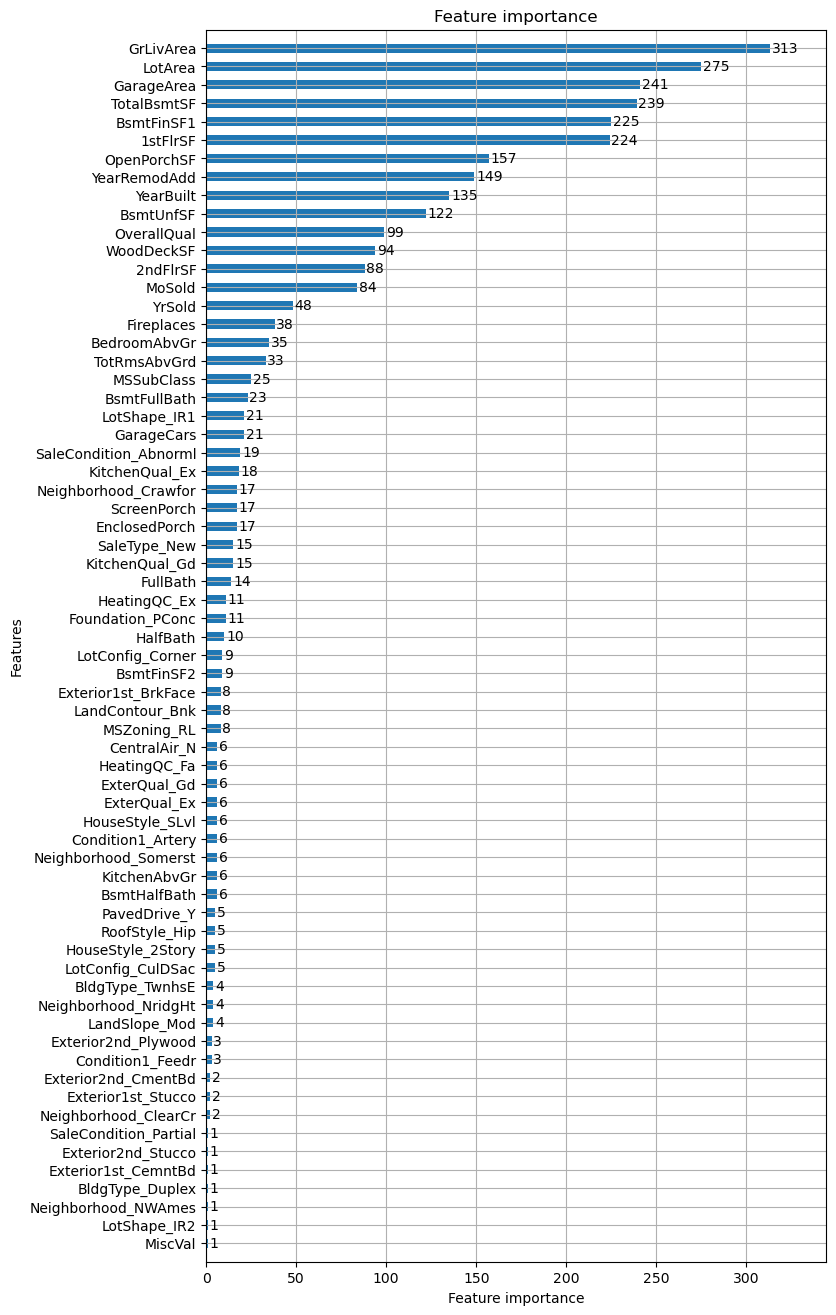

In [23]:
lgb.plot_importance(model, height = 0.5, figsize = (8, 16))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2418
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 32
[LightGBM] [Info] Start training from score 181438.534247
0.9009307429144974


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

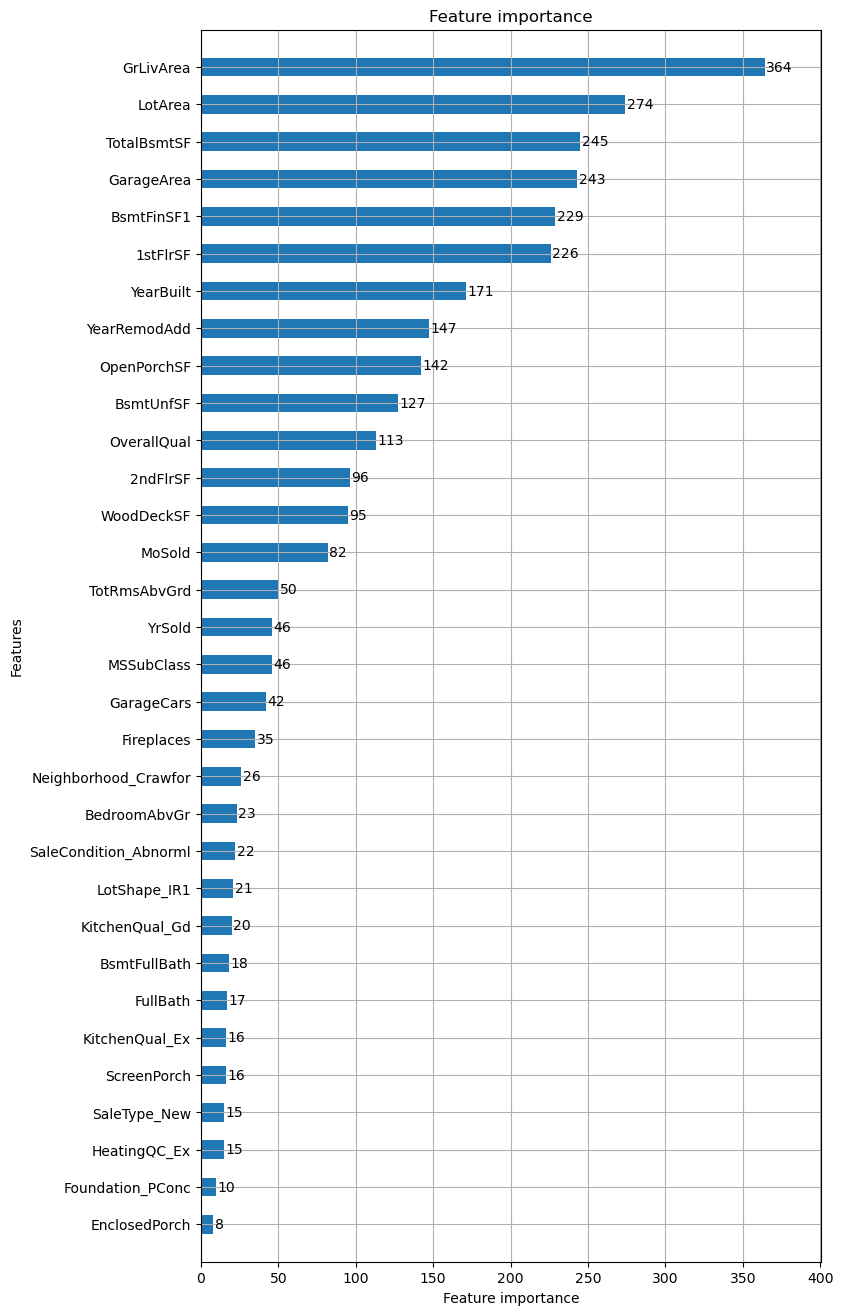

In [24]:
# 特徴量の重要度を取得
importance = model.feature_importance()

# 重要度が50を超える特徴量の名前を取得
features = [feature for feature, imp in zip(X_train.columns, importance) if imp > 10]

# 選択した特徴量だけで新たにX_trainとX_testを作成
X_train = X_train[features]
X_test = X_test[features]

# データセットを更新
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

params = {"metrics" : "rmse", 'learning_rate': 0.08}
model = lgb.train(params, dtrain)

from sklearn.metrics import r2_score

print(r2_score(y_test, model.predict(X_test)))

lgb.plot_importance(model, height = 0.5, figsize = (8, 16))


In [25]:
features

['MSSubClass',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'YrSold',
 'LotShape_IR1',
 'Neighborhood_Crawfor',
 'Foundation_PConc',
 'HeatingQC_Ex',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'SaleType_New',
 'SaleCondition_Abnorml']

In [26]:
test = pd.read_csv('test.csv')

In [27]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [33]:
Id = test["Id"]

In [34]:
Id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [35]:
Id = pd.DataFrame(Id)

In [36]:
Id

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [37]:
ohe_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition']

test = pd.get_dummies(test, columns=ohe_columns)

In [38]:
test

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,NaN,5,6,1961,1961,None,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,NaN,6,6,1958,1958,BrkFace,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,NaN,5,5,1997,1998,None,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,NaN,6,6,1998,1998,BrkFace,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,NaN,8,5,1992,1992,None,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,NaN,4,7,1970,1970,None,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,NaN,4,5,1970,1970,None,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,NaN,5,7,1960,1996,None,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,NaN,5,5,1992,1992,None,...,0,0,0,1,0,0,0,0,1,0


In [39]:
test = test[features]

In [40]:
test

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold,YrSold,LotShape_IR1,Neighborhood_Crawfor,Foundation_PConc,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_Gd,SaleType_New,SaleCondition_Abnorml
0,20,11622,5,1961,1961,468.0,270.0,882.0,896,0,...,6,2010,0,0,0,0,0,0,0,0
1,20,14267,6,1958,1958,923.0,406.0,1329.0,1329,0,...,6,2010,1,0,0,0,0,1,0,0
2,60,13830,5,1997,1998,791.0,137.0,928.0,928,701,...,3,2010,1,0,1,0,0,0,0,0
3,60,9978,6,1998,1998,602.0,324.0,926.0,926,678,...,6,2010,1,0,1,1,0,1,0,0
4,120,5005,8,1992,1992,263.0,1017.0,1280.0,1280,0,...,1,2010,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,1970,1970,0.0,546.0,546.0,546,546,...,6,2006,0,0,0,0,0,0,0,0
1455,160,1894,4,1970,1970,252.0,294.0,546.0,546,546,...,4,2006,0,0,0,0,0,0,0,1
1456,20,20000,5,1960,1996,1224.0,0.0,1224.0,1224,0,...,9,2006,0,0,0,1,0,0,0,1
1457,85,10441,5,1992,1992,337.0,575.0,912.0,970,0,...,7,2006,0,0,1,0,0,0,0,0


In [41]:
pred = model.predict(test)

In [42]:
pred


array([131865.32996603, 152817.46100066, 179787.87376096, ...,
       162579.1295564 , 118339.60842548, 225011.89832821])

In [43]:
prediction = pd.DataFrame(pred, columns=["SalePrice"])

In [44]:
combined_df = pd.concat([Id, prediction], axis=1)

In [45]:
combined_df

,Id,SalePrice
0,1461,131865.329966
1,1462,152817.461001
2,1463,179787.873761
3,1464,189430.139344
4,1465,189473.190872
...,...,...
1454,2915,69498.053695
1455,2916,84308.569304
1456,2917,162579.129556
1457,2918,118339.608425


In [46]:
combined_df.to_csv("combined_df3.csv", index=False)